In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split as tts
from scipy.stats import norm, gaussian_kde
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [2]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip

In [3]:
# !unzip codon_usage.csv.zip

In [4]:
def read_data(file_name):
    """
    Reads in a csv file and returns a dataframe
    """
    return pd.read_csv(file_name, low_memory=False)

dataset = read_data('codon_usage.csv')

# EDA & PREPROCESSING

In [5]:
dataset.shape

(13028, 69)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [7]:
dataset = dataset.drop(dataset[dataset['SpeciesID']==353569].index)
dataset = dataset.drop(dataset[dataset['SpeciesID']==12440].index)

In [8]:
dataset.describe(include='all')

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026,13026.000000,13026.000000,1.302600e+04,13026,13026,13026,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
unique,11,NaN,NaN,NaN,13014,4789,4119,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,bct,NaN,NaN,NaN,Escherichia coli O157,0,0.01911,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2919,NaN,NaN,NaN,4,81,43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.367265,130443.036926,7.961776e+04,NaN,NaN,NaN,0.020637,0.014104,0.017821,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,NaN,0.688764,124777.067741,7.197556e+05,NaN,NaN,NaN,0.020710,0.009280,0.010587,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,NaN,0.000000,7.000000,1.000000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,28851.250000,1.602000e+03,NaN,NaN,NaN,0.005610,0.007103,0.010890,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,NaN,0.000000,81971.500000,2.929000e+03,NaN,NaN,NaN,0.015260,0.013360,0.016130,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,NaN,1.000000,222890.500000,9.120000e+03,NaN,NaN,NaN,0.029495,0.019808,0.022730,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031128,0.002370,0.000830,0.002890


In [9]:
dataset.isnull().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [10]:
print(dataset.Kingdom.unique())
len(dataset.Kingdom.unique())

['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']


11

In [11]:
dataset['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [12]:
dataset['UUU'] = dataset['UUU'].astype(float)
dataset['UUC'] = dataset['UUC'].astype(float)

cols = dataset.select_dtypes(np.number).columns

num_columns_list = list(cols)
# num_columns_list

# num_columns_list.remove('Kingdom')
num_columns_list.remove('DNAtype')
num_columns_list.remove('SpeciesID')
num_columns_list.remove('Ncodons')

for num_column in num_columns_list:
    dataset[num_column] = minmax_scale(dataset[num_column])
#     # df['a'] = minmax_scale(df['a'])

In [13]:
species_kingdoms = dataset['Kingdom'].unique()

In [14]:
features = dataset.columns[5:].values
print(features)

['UUU' 'UUC' 'UUA' 'UUG' 'CUU' 'CUC' 'CUA' 'CUG' 'AUU' 'AUC' 'AUA' 'AUG'
 'GUU' 'GUC' 'GUA' 'GUG' 'GCU' 'GCC' 'GCA' 'GCG' 'CCU' 'CCC' 'CCA' 'CCG'
 'UGG' 'GGU' 'GGC' 'GGA' 'GGG' 'UCU' 'UCC' 'UCA' 'UCG' 'AGU' 'AGC' 'ACU'
 'ACC' 'ACA' 'ACG' 'UAU' 'UAC' 'CAA' 'CAG' 'AAU' 'AAC' 'UGU' 'UGC' 'CAU'
 'CAC' 'AAA' 'AAG' 'CGU' 'CGC' 'CGA' 'CGG' 'AGA' 'AGG' 'GAU' 'GAC' 'GAA'
 'GAG' 'UAA' 'UAG' 'UGA']


In [15]:
classes_dict = {    'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
                    'pln': 4, 'inv': 5, 'vrt': 6, 'mam': 7,
                    'rod': 8, 'pri': 9, 'vrl':10
                }

dataset['Kingdom'] = dataset['Kingdom'].map(classes_dict)

<AxesSubplot:>

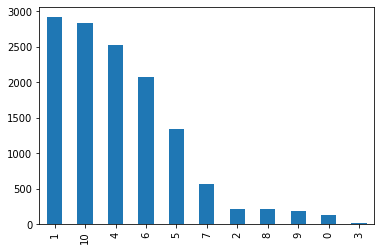

In [16]:
dataset['Kingdom'].value_counts().plot(kind='bar')

In [17]:
dataset_copy = dataset.iloc[:,:].copy()
dataset_copy.drop(['DNAtype', 'SpeciesName', 'SpeciesID', 'Ncodons'], axis=1, inplace=True)

### Univariate Analysis

In [18]:
def hist_plot(feature,  classes='Kingdom'):
    """
    Plots a histogram of a feature
    """
    sns.displot(data=dataset, x=feature, hue=classes)
    plt.title(feature)
    plt.show()
    


def boxplot_plot(feature, classes='Kingdom', axes=None):
    """
    Plots a boxplot of a feature
    """
    sns.boxplot(x=classes, y=feature, data=dataset, ax=axes)
    plt.title(feature)
    plt.show()

In [19]:
# # anomaly_lister = ['UUU','UUC']
# anomaly_lister = []

# for feature in features:
#     hist_plot(feature, classes='Kingdom')
#     boxplot_plot(feature, classes='Kingdom')


In [20]:
# fig, axes = plt.subplots(16, 4, figsize=(30, 40))
# for feature, ax in zip(dataset_copy.iloc[:,1:], axes.flatten()):
#     sns.histplot(data=dataset_copy[feature],ax=ax)
#     median = dataset_copy[feature].median()
#     ax.set_title( f'{feature} ,Median : {median:0.3f}')
#     ax.axvline(median, color ='red', alpha=0.5)
# plt.show()



In [21]:

# fig, axes = plt.subplots(16, 4, figsize=(40, 60))
# for feature, ax in zip(dataset_copy.iloc[:,1:], axes.flatten()):
#     sns.violinplot(data=dataset_copy,ax=ax, x='Kingdom', y=feature)
#     median = dataset_copy[feature].median()

# plt.show()

In [22]:
features

array(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU',
       'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC',
       'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC',
       'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU',
       'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC',
       'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA',
       'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG',
       'UGA'], dtype=object)

In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor



X_variables = dataset_copy[dataset_copy.columns[1:]]

In [24]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [25]:
vif_data.sort_values(by="VIF", inplace=True)

In [26]:
vif_data

,feature,VIF
62,UAG,1.590768
61,UAA,2.641256
46,UGC,5.319405
56,AGG,5.959344
45,UGU,6.372510
...,...,...
9,AUC,19.933961
1,UUC,20.355106
8,AUU,20.426639
17,GCC,20.601140


<AxesSubplot:ylabel='feature'>

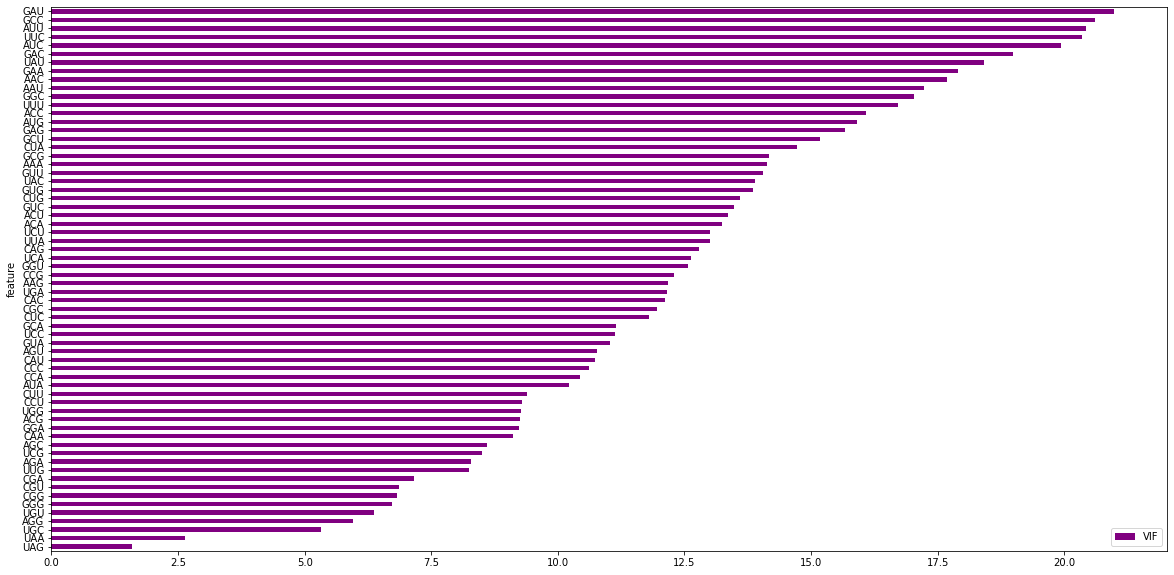

In [27]:
vif_data.sort_values(by="VIF", inplace=True)
vif_data.plot.barh(x="feature", y="VIF", figsize=(20, 10), color="purple")


In [28]:

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = dataset_copy[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [29]:

compute_vif(features).sort_values('VIF', ascending=False)


,Variable,VIF
6,CUA,645185.278864
2,UUA,470309.959253
49,AAA,350908.015878
0,UUU,340730.633013
8,AUU,335989.343491
...,...,...
45,UGU,42571.812249
32,UCG,41077.179971
53,CGA,25098.701477
61,UAA,3495.044963


### Multi Variate Analysis

<AxesSubplot:>

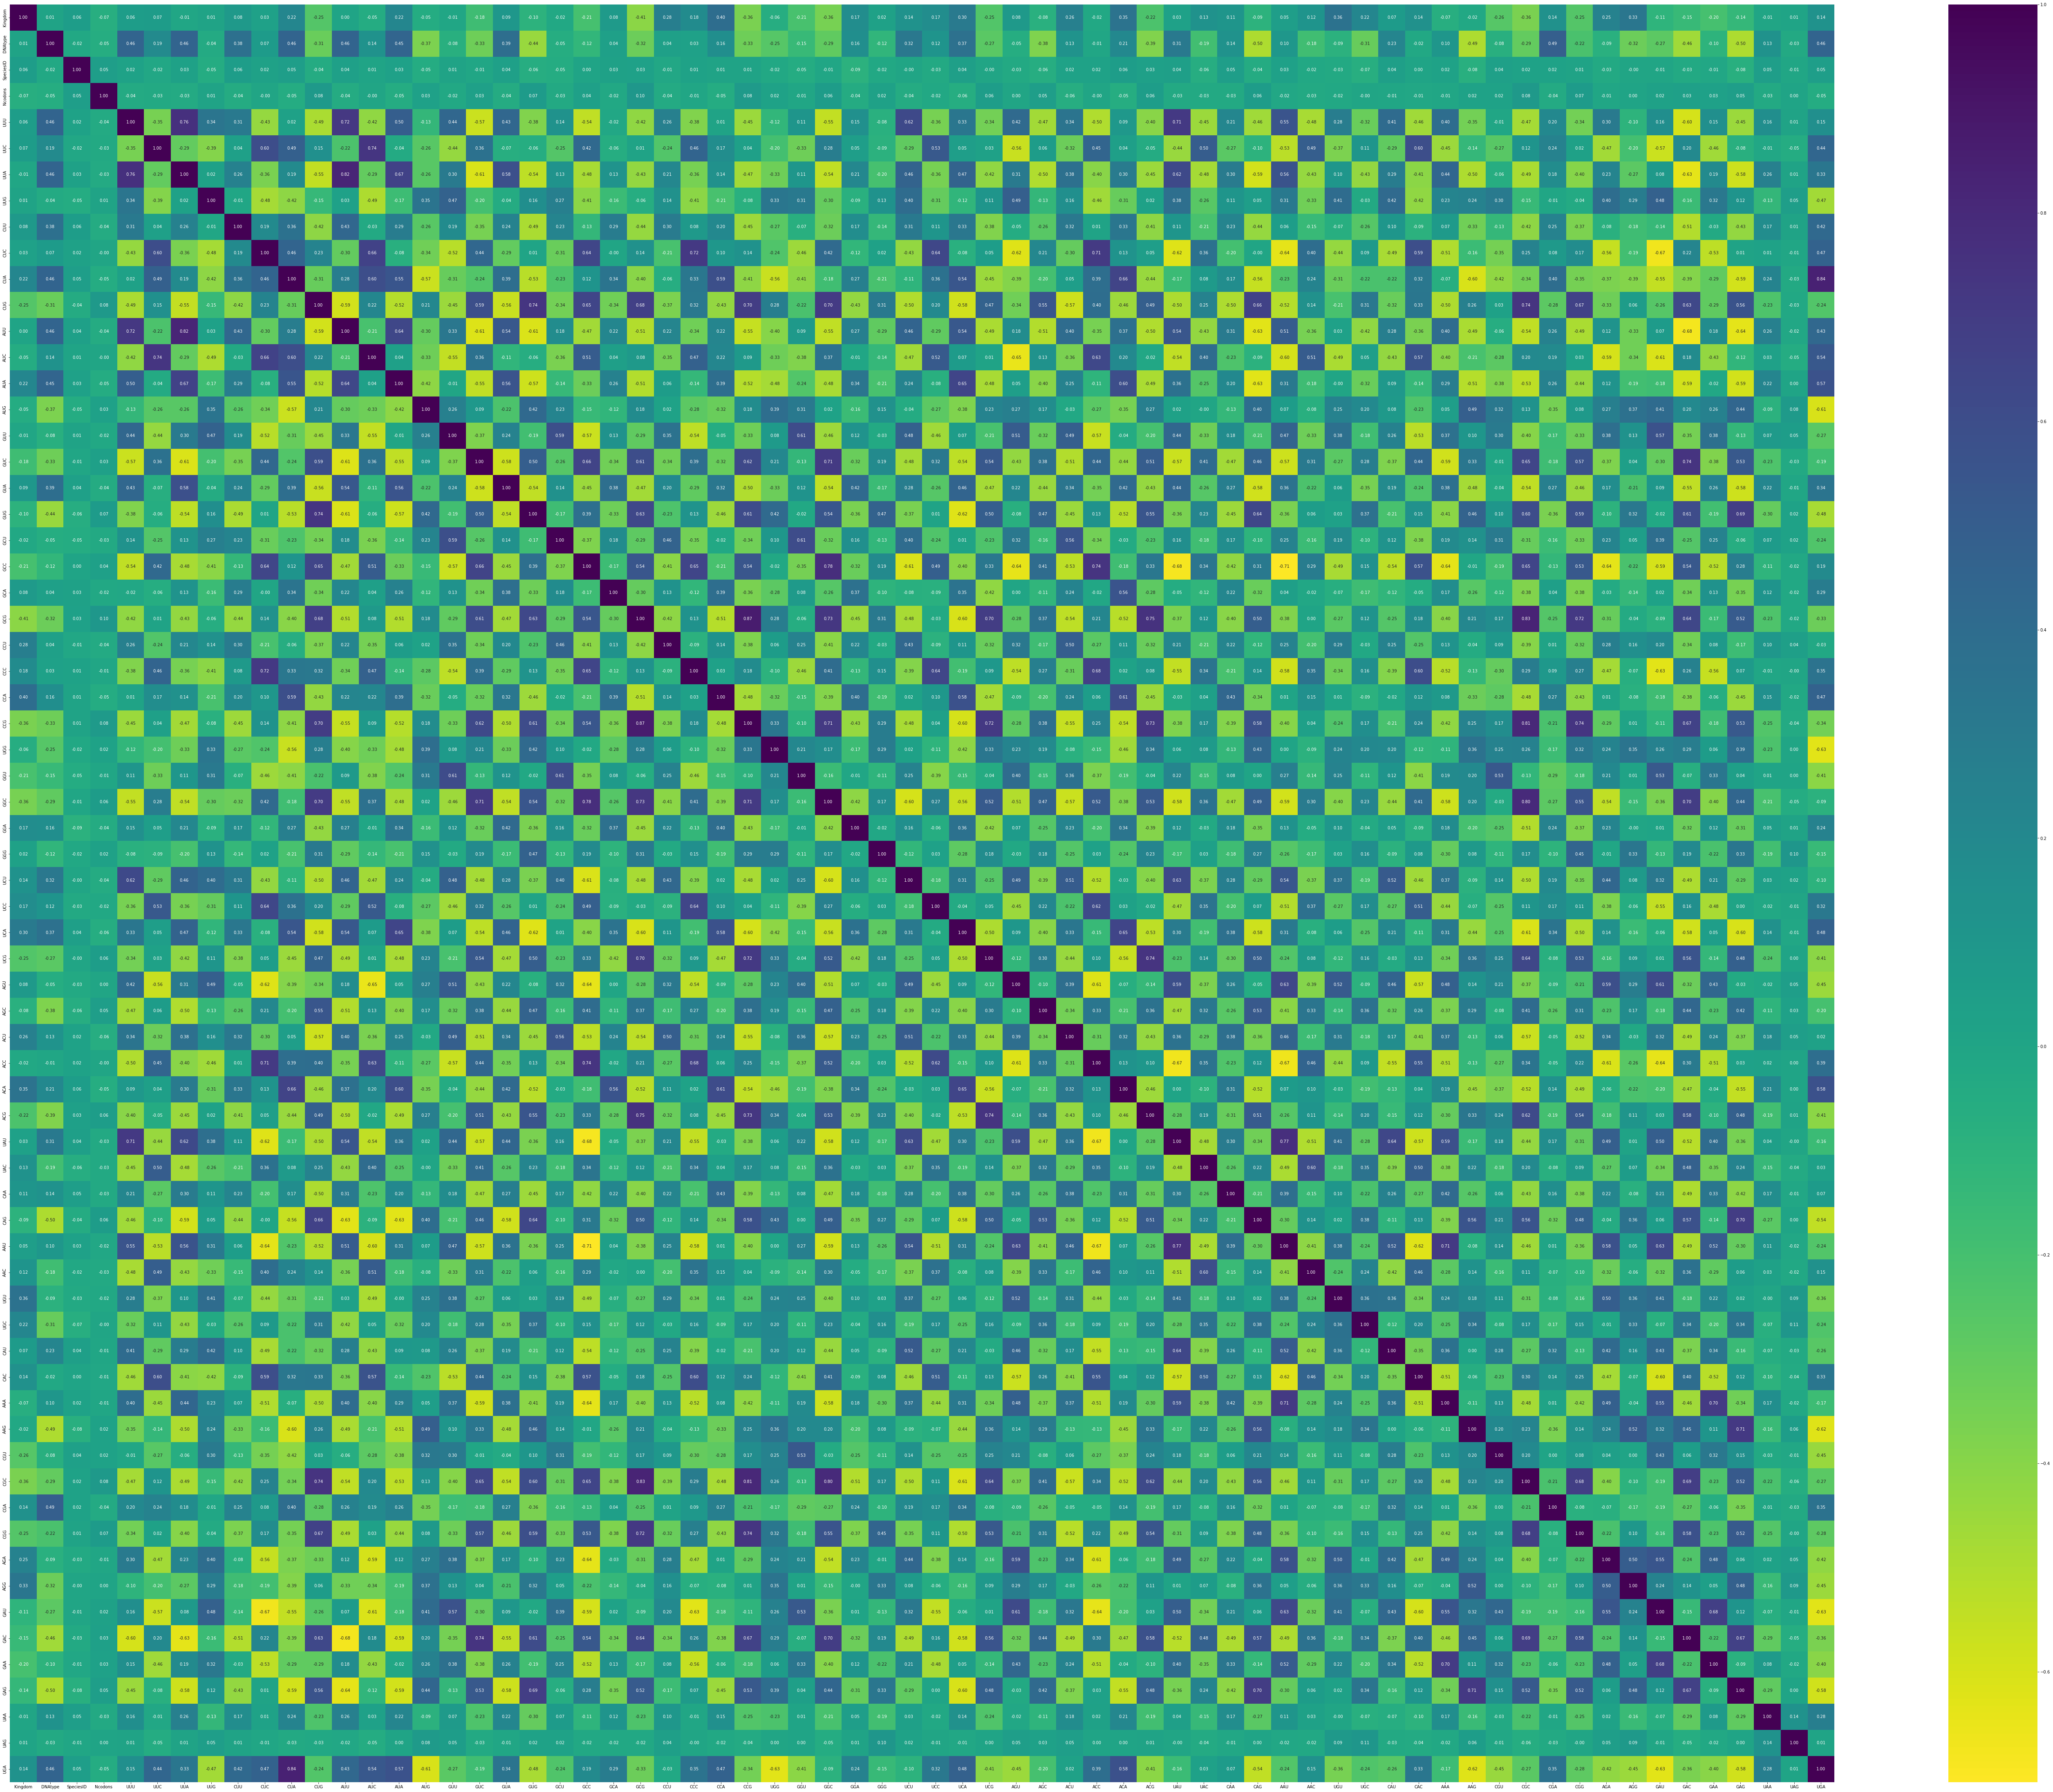

In [30]:
plt.figure(figsize=[100,80])
sns.heatmap(dataset.corr(), annot=True, cmap = 'viridis_r', fmt = '.2f')
# plt.savefig('heatmap.pdf')

# Data Splitting and preprocessing

In [31]:
X = dataset.iloc[:, 1:]
X.drop(['SpeciesName', 'SpeciesID', 'DNAtype', 'Ncodons'], axis=1, inplace=True)
X
X_original = X.copy()

In [32]:
X = X.values.astype(float)
y = dataset.iloc[:, 0]
y_original = y.values.astype(int)

In [33]:
class DataGenerator:

    def __init__(self, X, y, sampleSize=16):
        self.X = X
        self.y = y
        self.sampleSize = sampleSize
        if self.sampleSize <= 0 and self.sampleSize > len(self.X):
            return TypeError("sampleSize must be between 0 and ", len(X))

    def split_data(self, test_size=0.2, random_state=1):
        self.X_train, self.X_rem, self.y_train, self.y_rem = tts(self.X, self.y, test_size=test_size, random_state=random_state)
        return self.X_train, self.X_rem, self.y_train, self.y_rem
    

In [34]:
data_generator = DataGenerator(y=y, X=X)
X_training, X_testing, y_training, y_testing = data_generator.split_data()
X_training_original = X_training.copy()
y_training_original = y_training.copy()

In [35]:
X.shape

(13026, 64)

In [36]:
y.shape

(13026,)

> No columns can be removed as per the domain knowledge and the EDA we can see that there can be clear seperation between the distribution of data in the columns.

### Sampler

In [37]:
def sampler(X, y, technique):
    if technique =='ros':
        ros = RandomOverSampler(random_state=1)
        X_training, y_training = ros.fit_resample(X, y)
    
    elif technique =='smote':
        smoothing = SMOTE(random_state=1)
        X_training, y_training = smoothing.fit_resample(X, y)
    
    elif technique =='adasyn':
        adasyn = ADASYN(random_state=1)
        X_training, y_training = adasyn.fit_resample(X, y)
    
    return X_training, y_training

## MODEL BUILDING - Gausian Naive Bayes

In [38]:
class MultiClassClassification:
    def __init__(self, X_train, y_train, laplace_smoothing_value, laplace, total_classes=11, for_arc = False, for_plm = False):
        self.laplace_smoothing_value = laplace_smoothing_value
        self.laplace = laplace
        self.total_classes = total_classes
        self.X_train = X_train
        self.y_train = y_train
        self.for_arc = for_arc
        self.for_plm = for_plm
        self.fitFeatures = []
        self.list_of_ranges = []
        self.set_of_ranges = set([])

    def fit_distribution(self, data):

        # mean = np.mean(data) # mean of the data
        # std = np.std(data) # standard deviation of the data
        # dist = norm(mean, std) # create a normal distribution with the mean and standard deviation

        # return dist
        return gaussian_kde(data)  # return the distribution

    def laplace_smoothing(self, classes, length):
        smooths = np.empty(self.total_classes, dtype=object)
        for i in range(length):
            smooths[i] = (classes[i] + self.laplace_smoothing_value) / \
                ((classes[i].size) +
                 self.laplace_smoothing_value * self.n_features)

        return smooths

    def probability(self, data):
        py = np.ones(self.total_classes)

        for i in range(self.n_features):
            for j in range(self.total_classes):
                py[j] *= self.features['X'+str(i)+'-'+str(j)].pdf(data[i])

        for i in range(self.total_classes):
            py[i] *= self.prior[i]

        # print('while training: ', py)
        return py

    def laplace_probability(self, data):

        py = np.ones(self.total_classes)
        pdf = np.ones(self.total_classes)

        for i in range(self.n_features):
            for j in range(self.total_classes):
                pdf[j] *= self.features['X'+str(i)+'-'+str(j)].pdf(data[i])

            smooths = self.laplace_smoothing(pdf, self.total_classes)
            for j in range(self.total_classes):
                py[j] *= smooths[j]

        for i in range(self.total_classes):
            py[i] *= self.prior[i]

        return py

    def fit(self):

        X_training_class = np.empty(self.total_classes, dtype=object)
        for i in range(self.total_classes):
            X_training_class[i] = self.X_train[self.y_train == i]

        self.prior = np.zeros(self.total_classes)
        for i in range(self.total_classes):
            # print('setting prior', i)
            if self.for_arc or self.for_plm:
                self.prior[i] = 1 - (len(X_training_class[i]) / len(self.X_train))
            else:
                self.prior[i] = len(X_training_class[i]) / len(self.X_train)
            self.prior[i] = len(X_training_class[i]) / len(self.X_train)

        self.n_features = self.X_train.shape[1]
        print('Number of features: ', self.n_features)
        self.features = {}

        for i in range(self.n_features):
            for j in range(self.total_classes):
                temp = 'X'+str(i)+'-'+str(j)
                self.features[temp] = self.fit_distribution(X_training_class[j][:, i])
                # print(str(i), str(j), temp)
                # self.list_of_ranges.append(temp)
                # if temp in self.set_of_ranges:
                #     print(str(i), str(j), 'Error: ', temp, ' already exists')
                # self.set_of_ranges.add(temp)


    def newvaluate(self):
        print(self.list_of_ranges)
        print(self.set_of_ranges)

    def predict(self, X_test, y_test):
        y_predicted = []
        
        y = []
        for sample, target in zip(X_test, y_test):

            if self.laplace:
                py = self.laplace_probability(sample)

            else:
                py = self.probability(sample)

            # print("Model predicted class {} and truth was {}".format(np.argmax(py), target))
            # print(py)
            # print(np.argmax(py))
            y_predicted.append(np.argmax(py))
            # print(py)
            y.append(target)

        y_predicted = np.array(y_predicted)
        y = np.array(y)
        return y_predicted, y


### confusion matrix and validation

In [39]:
import matplotlib.pyplot as plt


def draw_matrix(true_positive, false_positive, false_negative, true_negative):
    '''
      Draw a confusion matrix.
    '''
    matrix = np.array([[true_positive, false_negative],
                      [false_positive, true_negative]])
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.viridis_r)
    plt.colorbar()
    plt.show()


def confusion_matrix_calculator(y, y_predicted, desired_class):
    '''
      Takes original classes and predicted classes as input
    '''
    print('total y', y.size)
    print('total y_predicted', y_predicted.size)

    actual = (y == desired_class)
    predicted = (y_predicted == desired_class)
    print('actual', actual.sum())
    true_positive = (actual & predicted).sum()
    false_negative = (actual & ~predicted).sum()
    false_positive = (~actual & predicted).sum()
    true_negative = (~actual & ~predicted).sum()

    return true_positive, false_negative, false_positive, true_negative


In [40]:
def validation(given_y, y_predicted, classification_class='Kingdom', desired_classes = classes_dict):
    '''
      Takes sampling technique as input

      Returns:
        precision, recall, accuracy
    '''
    for class_name in desired_classes.keys():
        print(class_name)
        print(dataset[dataset[classification_class] == int(
            desired_classes.get(class_name))][classification_class].count())
        true_positive, false_negative, false_positive, true_negative = confusion_matrix_calculator(y=given_y, y_predicted=y_predicted, desired_class=int(desired_classes.get(class_name)))
      #   draw_matrix(true_positive= true_positive, true_negative= true_negative, false_positive= false_positive, false_negative= false_negative)
        print("true positive:", true_positive)
        print("false negative:", false_negative)
        print("false positive:", false_positive)
        print("true negative:", true_negative)
        print("Precision:", true_positive / (true_positive + false_positive))
        print("True Positive rate or Recall:",
              true_positive / (true_positive + false_negative))
        print("specificity, selectivity or True Negative Rate:",
              true_negative / (true_negative + false_positive))
        print("Accuracy:", (true_positive + true_negative) /
              (true_positive + false_positive + false_negative + true_negative))
        print("\n")


In [41]:
def original_accuracy(y, y_predicted):
    '''
      Takes original classes and predicted classes as input
    '''
    actual = (y == y_predicted)
    return actual.sum() / len(y)


Using Sampling Technique:  smote
X_train shape:  (25687, 64)
y_train shape:  (25687,)
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)




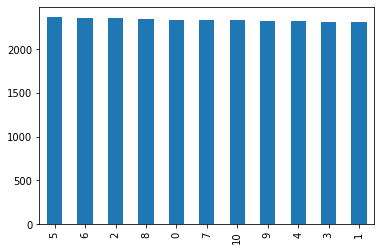



Number of features:  64
Model is trained
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)
Y_predicted:  [10 10 10 ... 10  6  1]
y_predicted shape:  (2606,)
Y_test:  [ 5  5 10 ...  1  6  4]
y_test shape:  (2606,)
Original Accuracy:  0.6289332310053722
arc
126
total y 2606
total y_predicted 2606
actual 27
true positive: 18
false negative: 9
false positive: 21
true negative: 2558
Precision: 0.46153846153846156
True Positive rate or Recall: 0.6666666666666666
specificity, selectivity or True Negative Rate: 0.9918573090345095
Accuracy: 0.9884881043745203


bct
2919
total y 2606
total y_predicted 2606
actual 618
true positive: 301
false negative: 317
false positive: 134
true negative: 1854
Precision: 0.6919540229885057
True Positive rate or Recall: 0.48705501618122976
specificity, selectivity or True Negative Rate: 0.9325955734406438
Accuracy: 0.8269378357636225


phg
220
total y 2606
total y_predicted 2606
actual 37
true positive: 29
false negative: 8
false positive: 108
true negati

In [42]:
# techniques = ['smote', 'ros']
techniques = ['smote']

for technique in techniques:
    # sampler(X, y, technique)
    print('Using Sampling Technique: ', technique)
    SCALLED_X_train, SCALLED_y_train = sampler(X, y ,technique=technique)
    data_generator = DataGenerator(y=SCALLED_y_train, X=SCALLED_X_train)
    X_train, X_test, y_train, y_test = data_generator.split_data()
    # X_train, y_train, 
    # X_train, y_train = X_training, y_training
    print('X_train shape: ', X_train.shape)
    print('y_train shape: ', y_train.shape)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)

    print('\n')
    y_train.value_counts().plot(kind='bar')
    plt.show()
    print('\n')

    clf = MultiClassClassification(X_train=X_train, y_train=y_train, total_classes=11, laplace=False, laplace_smoothing_value=0.5,  for_arc=False, for_plm=False)
    clf.fit()
    print('Model is trained')
    # y_predicted, y
    y_predicted, given_y = clf.predict(X_test=X_testing, y_test=y_testing)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)
    
    print('Y_predicted: ', y_predicted)
    print('y_predicted shape: ', y_predicted.shape)
    print('Y_test: ', given_y)
    print('y_test shape: ', given_y.shape)
    print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


    # 'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
    # clf_arc = MultiClassClassification(X_train=X_training, y_train=y_training, total_classes=11, laplace=False, laplace_smoothing_value=0.5, for_arc=True)
    # clf_arc.fit()
    # print('Model is trained for ARC')
    # y_predicted, given_y = clf_arc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)
    
    
    # print('for prc')
    # clf_prc = MultiClassClassification(X_train=X_training, y_train=y_training, laplace=False, total_classes=11, laplace_smoothing_value=0.5, for_plm=True)
    # clf_prc.fit()
    # y_predicted, given_y = clf_prc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


In [43]:
print(X_training.shape)
print(X_train.shape)
print(X_test.shape)
print(X_testing.shape)

(10420, 64)
(25687, 64)
(6422, 64)
(2606, 64)


In [44]:
class PCA:
    def __init__(self, n):
        self.n = n
        self.components = None
    
    def fit(self, X):
        cov = np.cov(X, rowvar=False)
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        # eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
        u, s, vh = np.linalg.svd(cov)

        eigen_vectors = eigen_vectors.T
        ids = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[ids]
        eigen_vectors = eigen_vectors[ids]


        self.components = eigen_vectors[:self.n]
        plt.bar(range(X.shape[1]), s, width=0.5)
        plt.show()

    def transform(self, X):
        return np.dot(X, self.components.T)

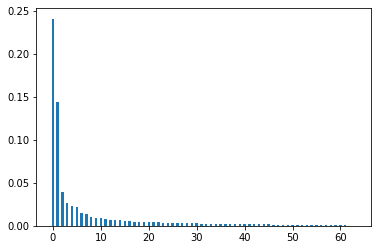

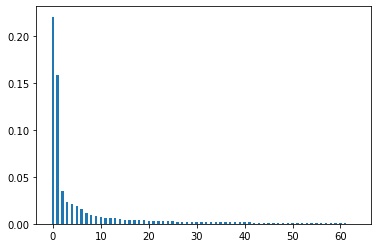

In [48]:
model_PCA = PCA(n=32)
model_PCA.fit(X_training)
X_training_pca = model_PCA.transform(X_training)

model_PCA = PCA(n=32)
model_PCA.fit(X_train)
X_train_pca = model_PCA.transform(X_train)

In [46]:
X_train_pca.shape

(25687, 32)

X_train shape:  (25687, 32)
y_train shape:  (25687,)
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)




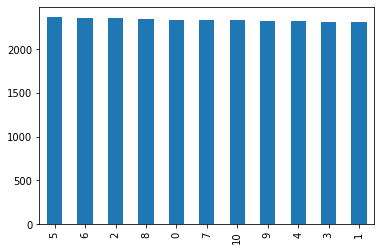



Number of features:  32
Model is trained
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)
Y_predicted:  [5 1 5 ... 5 5 5]
y_predicted shape:  (2606,)
Y_test:  [ 5  5 10 ...  1  6  4]
y_test shape:  (2606,)
Original Accuracy:  0.2689946277820414
arc
126
total y 2606
total y_predicted 2606
actual 27
true positive: 0
false negative: 27
false positive: 24
true negative: 2555
Precision: 0.0
True Positive rate or Recall: 0.0
specificity, selectivity or True Negative Rate: 0.9906940674680108
Accuracy: 0.9804297774366846


bct
2919
total y 2606
total y_predicted 2606
actual 618
true positive: 212
false negative: 406
false positive: 277
true negative: 1711
Precision: 0.4335378323108384
True Positive rate or Recall: 0.343042071197411
specificity, selectivity or True Negative Rate: 0.8606639839034205
Accuracy: 0.7379125095932464


phg
220
total y 2606
total y_predicted 2606
actual 37
true positive: 0
false negative: 37
false positive: 0
true negative: 2569
Precision: nan
True Positive rat

/var/folders/wk/l9zgtb4s7_3c2sj1y3jkfq3h0000gn/T/ipykernel_18536/1029519792.py:18: RuntimeWarning: invalid value encountered in long_scalars
  print("Precision:", true_positive / (true_positive + false_positive))


In [47]:
# techniques = ['smote', 'ros']
techniques = ['smote']

for technique in techniques:
    # # sampler(X, y, technique)
    # print('Using Sampling Technique: ', technique)
    # SCALLED_X_train, SCALLED_y_train = sampler(X, y ,technique=technique)
    # data_generator = DataGenerator(y=SCALLED_y_train, X=SCALLED_X_train)
    # X_train, X_test, y_train, y_test = data_generator.split_data()
    # # X_train, y_train, 
    # # X_train, y_train = X_training, y_training
    print('X_train shape: ', X_train_pca.shape)
    print('y_train shape: ', y_train.shape)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)

    print('\n')
    y_train.value_counts().plot(kind='bar')
    plt.show()
    print('\n')

    clf = MultiClassClassification(X_train=X_train_pca, y_train=y_train, total_classes=11, laplace=False, laplace_smoothing_value=0.5,  for_arc=False, for_plm=False)
    clf.fit()
    print('Model is trained')
    # y_predicted, y
    y_predicted, given_y = clf.predict(X_test=X_testing, y_test=y_testing)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)
    
    print('Y_predicted: ', y_predicted)
    print('y_predicted shape: ', y_predicted.shape)
    print('Y_test: ', given_y)
    print('y_test shape: ', given_y.shape)
    print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


    # 'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
    # clf_arc = MultiClassClassification(X_train=X_training, y_train=y_training, total_classes=11, laplace=False, laplace_smoothing_value=0.5, for_arc=True)
    # clf_arc.fit()
    # print('Model is trained for ARC')
    # y_predicted, given_y = clf_arc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)
    
    
    # print('for prc')
    # clf_prc = MultiClassClassification(X_train=X_training, y_train=y_training, laplace=False, total_classes=11, laplace_smoothing_value=0.5, for_plm=True)
    # clf_prc.fit()
    # y_predicted, given_y = clf_prc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


X_train shape:  (10420, 32)
y_train shape:  (10420,)
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)




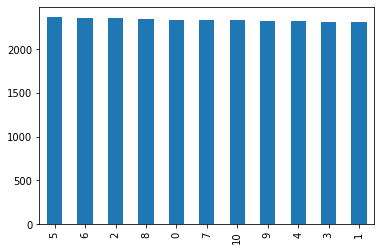



Number of features:  32
Model is trained
X_testing shape:  (2606, 64)
y_testing shape:  (2606,)
Y_predicted:  [5 1 5 ... 5 5 5]
y_predicted shape:  (2606,)
Y_test:  [ 5  5 10 ...  1  6  4]
y_test shape:  (2606,)
Original Accuracy:  0.2689946277820414
arc
126
total y 2606
total y_predicted 2606
actual 27
true positive: 0
false negative: 27
false positive: 24
true negative: 2555
Precision: 0.0
True Positive rate or Recall: 0.0
specificity, selectivity or True Negative Rate: 0.9906940674680108
Accuracy: 0.9804297774366846


bct
2919
total y 2606
total y_predicted 2606
actual 618
true positive: 212
false negative: 406
false positive: 277
true negative: 1711
Precision: 0.4335378323108384
True Positive rate or Recall: 0.343042071197411
specificity, selectivity or True Negative Rate: 0.8606639839034205
Accuracy: 0.7379125095932464


phg
220
total y 2606
total y_predicted 2606
actual 37
true positive: 0
false negative: 37
false positive: 0
true negative: 2569
Precision: nan
True Positive rat

/var/folders/wk/l9zgtb4s7_3c2sj1y3jkfq3h0000gn/T/ipykernel_18536/1029519792.py:18: RuntimeWarning: invalid value encountered in long_scalars
  print("Precision:", true_positive / (true_positive + false_positive))


In [49]:
# techniques = ['smote', 'ros']
techniques = ['smote']

for technique in techniques:
    # # sampler(X, y, technique)
    # print('Using Sampling Technique: ', technique)
    # SCALLED_X_train, SCALLED_y_train = sampler(X, y ,technique=technique)
    # data_generator = DataGenerator(y=SCALLED_y_train, X=SCALLED_X_train)
    # X_train, X_test, y_train, y_test = data_generator.split_data()
    # # X_train, y_train, 
    # # X_train, y_train = X_training, y_training
    print('X_train shape: ', X_training_pca.shape)
    print('y_train shape: ', y_training.shape)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)
    
    print('\n')
    y_train.value_counts().plot(kind='bar')
    plt.show()
    print('\n')

    clf = MultiClassClassification(X_train=X_train_pca, y_train=y_train, total_classes=11, laplace=False, laplace_smoothing_value=0.5,  for_arc=False, for_plm=False)
    clf.fit()
    print('Model is trained')
    # y_predicted, y
    y_predicted, given_y = clf.predict(X_test=X_testing, y_test=y_testing)
    print('X_testing shape: ', X_testing.shape)
    print('y_testing shape: ', y_testing.shape)
    
    print('Y_predicted: ', y_predicted)
    print('y_predicted shape: ', y_predicted.shape)
    print('Y_test: ', given_y)
    print('y_test shape: ', given_y.shape)
    print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)


    # 'arc': 0, 'bct': 1, 'phg': 2, 'plm': 3, 
    # clf_arc = MultiClassClassification(X_train=X_training, y_train=y_training, total_classes=11, laplace=False, laplace_smoothing_value=0.5, for_arc=True)
    # clf_arc.fit()
    # print('Model is trained for ARC')
    # y_predicted, given_y = clf_arc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)
    
    
    # print('for prc')
    # clf_prc = MultiClassClassification(X_train=X_training, y_train=y_training, laplace=False, total_classes=11, laplace_smoothing_value=0.5, for_plm=True)
    # clf_prc.fit()
    # y_predicted, given_y = clf_prc.predict(X_test=X_testing, y_test=y_testing)
    # print('Original Accuracy: ', original_accuracy(given_y, y_predicted))
    # validation(given_y= given_y, y_predicted= y_predicted, desired_classes = classes_dict)
